In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Clinical Data
clinical_train = pd.read_csv("data/X_train/clinical_train.csv")
clinical_test = pd.read_csv("data/X_test/clinical_test.csv")

# Molecular Data
molecular_train = pd.read_csv("data/X_train/molecular_train.csv")
molecular_test = pd.read_csv("data/X_test/molecular_test.csv")

target_train = pd.read_csv("data/X_train/target_train.csv")

,ID,CENTER,BM_BLAST,WBC,ANC,MONOCYTES,HB,PLT,CYTOGENETICS
0,P132697,MSK,14.0,2.8,0.2,0.7,7.6,119.0,"46,xy,del(20)(q12)[2]/46,xy[18]"
1,P132698,MSK,1.0,7.4,2.4,0.1,11.6,42.0,"46,xx"
2,P116889,MSK,15.0,3.7,2.1,0.1,14.2,81.0,"46,xy,t(3;3)(q25;q27)[8]/46,xy[12]"
3,P132699,MSK,1.0,3.9,1.9,0.1,8.9,77.0,"46,xy,del(3)(q26q27)[15]/46,xy[5]"
4,P132700,MSK,6.0,128.0,9.7,0.9,11.1,195.0,"46,xx,t(3;9)(p13;q22)[10]/46,xx[10]"


## `clinical_train.csv`

In [ ]:
# Preview the data
clinical_train.head()

In [14]:
clinical_train.shape

(3323, 9)

In [37]:
clinical_train["ID"].duplicated().sum()

np.int64(0)

In [3]:
clinical_train.isna().mean()

ID              0.000000
CENTER          0.000000
BM_BLAST        0.032802
WBC             0.081854
ANC             0.058080
MONOCYTES       0.180861
HB              0.033103
PLT             0.037316
CYTOGENETICS    0.116461
dtype: float64

<Axes: >

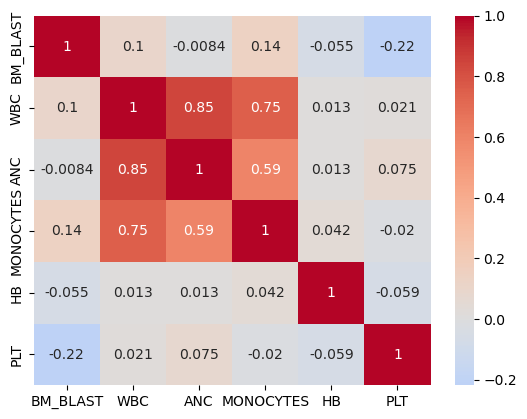

In [12]:
corr = clinical_train.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)

## `molecular_train.csv`

In [17]:
molecular_train.head()

,ID,CHR,START,END,REF,ALT,GENE,PROTEIN_CHANGE,EFFECT,VAF,DEPTH
0,P100000,11,119149248.0,119149248.0,G,A,CBL,p.C419Y,non_synonymous_codon,0.0830,1308.0
1,P100000,5,131822301.0,131822301.0,G,T,IRF1,p.Y164*,stop_gained,0.0220,532.0
2,P100000,3,77694060.0,77694060.0,G,C,ROBO2,p.?,splice_site_variant,0.4100,876.0
3,P100000,4,106164917.0,106164917.0,G,T,TET2,p.R1262L,non_synonymous_codon,0.4300,826.0
4,P100000,2,25468147.0,25468163.0,ACGAAGAGGGGGTGTTC,A,DNMT3A,p.E505fs*141,frameshift_variant,0.0898,942.0


In [15]:
molecular_train.isna().mean()

ID                0.000000
CHR               0.010425
START             0.010425
END               0.010425
REF               0.010425
ALT               0.010425
GENE              0.000000
PROTEIN_CHANGE    0.001097
EFFECT            0.000000
VAF               0.008139
DEPTH             0.010425
dtype: float64

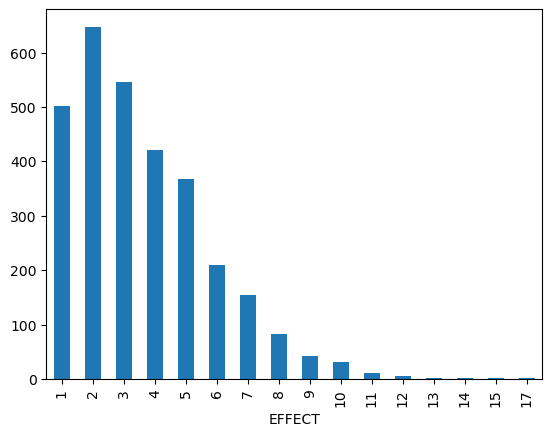

In [25]:
count_per_id = molecular_train.groupby("ID")["EFFECT"].count()
distribution = count_per_id.value_counts().sort_index()
distribution.plot(kind="bar")
plt.show()

## `target_train.csv`

In [7]:
target_train.isna().mean()

ID           0.00000
OS_YEARS     0.04514
OS_STATUS    0.04514
dtype: float64

In [26]:
target_train["OS_STATUS"].isna().mean()

np.float64(0.04513993379476377)

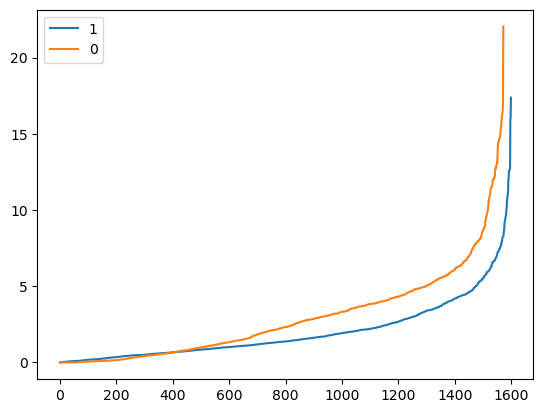

In [27]:
plt.plot(
    target_train[target_train["OS_STATUS"].astype(bool)]["OS_YEARS"]
    .sort_values()
    .to_numpy(),
    label=1,
)
plt.plot(
    target_train[~target_train["OS_STATUS"].astype(bool)]["OS_YEARS"]
    .sort_values()
    .to_numpy(),
    label=0,
)
plt.legend()
plt.show()

## `clinical_test.csv`

In [28]:
clinical_test.isna().mean()

ID              0.000000
CENTER          0.000000
BM_BLAST        0.096396
WBC             0.093881
ANC             0.118189
MONOCYTES       0.740151
HB              0.093043
PLT             0.096396
CYTOGENETICS    0.097234
dtype: float64

## `molecular_test.csv`

In [29]:
molecular_test.isna().mean()

ID                0.000000
CHR               0.022337
START             0.022337
END               0.022337
REF               0.022337
ALT               0.022337
GENE              0.000000
PROTEIN_CHANGE    0.014892
EFFECT            0.029136
VAF               0.000000
DEPTH             0.022337
dtype: float64

In [38]:
set(clinical_train["ID"]) & set(clinical_test["ID"])

set()